In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data
df = pd.read_csv("ex1data1.txt")
df.columns = ['Population', 'Profit']

In [3]:
#Numpy arrays
X = df['Population'].values
ones = np.ones(X.shape[0])
X = np.c_[ones, X]
y = df['Profit'].values

In [4]:
#Scaling the data minmax
X[:,1] = X[:,1]/np.max(X[:,1])
y = y/np.max(y)

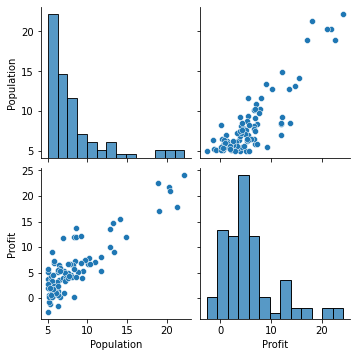

In [5]:
#Viz
sns.pairplot(df)

In [6]:
#the cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    J = 1/(2*m) * np.sum(np.square(h-y))
    return J

In [7]:
compute_cost(X, y, np.array([0.5,1.5]))

0.3410633023068047

In [8]:
#The Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    for i in range(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (h-y).dot(X)
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [9]:
theta, J_history = gradient_descent(X, y, np.array([0.0,0.5]), 0.1, 1500)

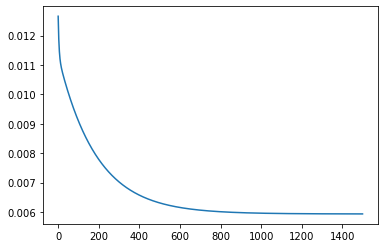

In [10]:
#The value of cost function
plt.plot(J_history)

In [31]:
#variables
theta

array([-0.17024523,  1.10484311])

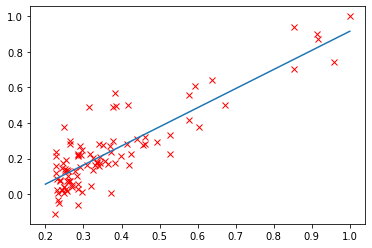

In [27]:
#plotting the curve with data
plt.plot(X[:,1], y, 'rx')
t = np.linspace(0.2,1,100)
plt.plot(t, theta[0] + theta[1]*t)

In [14]:
df

,Population,Profit
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [16]:
Scalar = MinMaxScaler()
X_scaled = Scalar.fit_transform(X[:,1].reshape(-1,1))
y_scaled = Scalar.transform(y.reshape(-1,1))


In [17]:
X_scaled = X_scaled.reshape(-1,1)

In [18]:
X_scaled.shape

(96, 1)

In [19]:
model = LinearRegression()
model.fit(X_scaled, y_scaled)


LinearRegression()

In [20]:
m = model.coef_.item()
c = model.intercept_.item()

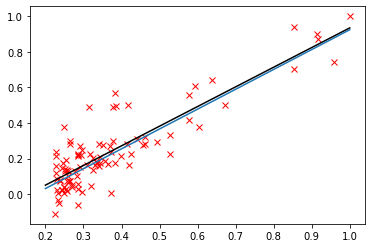

In [32]:
plt.plot(X[:,1], y, 'rx')
t = np.linspace(0.2,1,100)
plt.plot(t, theta[0] + theta[1]*t, 'k')
plt.plot(t, c + m*t)

In [22]:
model.score(X_scaled, y_scaled)

0.7606583419339847

In [23]:
m, c, theta[0], theta[1]

(1.1158483322370183,
 -0.19155052149339655,
 -0.17331023636293552,
 1.112940182292323)

## Multiple Variable Regression

In [3]:
#Import the data
df2 = pd.read_csv("ex1data2.txt")

In [4]:
df2.columns = ['Size', 'Bedrooms', 'Price']

In [16]:
X = df2[['Size', 'Bedrooms']].values
y = df2['Price'].values

In [17]:
# np.max(X[:,1])
X[:,1], np.max(X[:,0])

(array([3, 3, 2, 4, 4, 3, 3, 3, 3, 4, 3, 3, 5, 3, 4, 2, 3, 4, 4, 3, 2, 3,
        4, 3, 3, 3, 3, 3, 3, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 2, 3, 4, 3, 2,
        4, 3], dtype=int64),
 4478)

In [37]:
X_scaled = np.zeros(X.shape)
X_scaled[:,1] = X[:,1]/5
X_scaled[:, 0] = X[:,0]/4478
y_scaled = y/np.max(y)
X_scaled = np.c_[np.ones(X.shape[0]), X_scaled]

In [38]:
#Cost function
def compute_cost(X, y, theta):
    m = len(y)
    J = 0
    h = X.dot(theta)
    J = 1/(2*m) * np.sum(np.square(h-y))
    return J

In [40]:
compute_cost(X_scaled, y_scaled, np.array([0.5,1.0, 0.5]))

0.3125071443888055

In [69]:
#Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    for i in range(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (h-y).dot(X)
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [72]:
theta, J_history = gradient_descent(X_scaled, y_scaled, np.array([0.5,1.0, 0.5]), 0.01, 1000)

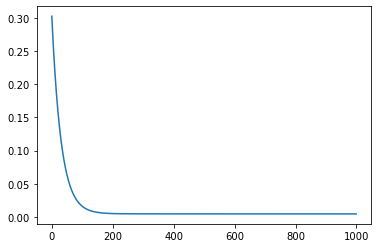

In [73]:
plt.plot(J_history)

In [48]:
theta

array([ 0.10943382,  0.85895643, -0.01326909])

In [49]:
compute_cost(X_scaled, y_scaled, theta)

0.004235566121188944

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()
model.fit(X_scaled, y_scaled)


LinearRegression()

In [53]:
model.coef_, theta

(array([ 0.        ,  0.887768  , -0.05848252]),
 array([ 0.10943382,  0.85895643, -0.01326909]))

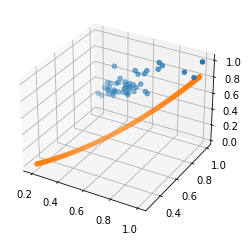

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')
t = np.linspace(0.2,1,100)
ax.scatter3D(X_scaled[:,1], X_scaled[:,0], y_scaled, cmap='Greens')
ax.scatter3D(t, theta[0] + theta[1]*t, theta[2] + theta[1]*t*t, 'k')

In [61]:
from sklearn.metrics import mean_squared_error

In [74]:
mean_squared_error(y_scaled, model.predict(X_scaled)), compute_cost(X_scaled, y_scaled, theta)

(0.008437115663766084, 0.004596020706953962)

## Solving linear ligression using the Normal Method
The normal equation formula is given below:
$$\theta = (X^T X)^{-1}X^T y$$

In [76]:
X_T = X_scaled.transpose()


In [83]:
first_term = np.dot(X_T, X_scaled)
first_term_inverse =  np.linalg.inv(first_term)

In [86]:
second_term = np.dot(X_T, y_scaled)
theta_by_normal = np.dot(first_term_inverse, second_term)

In [87]:
compute_cost(X_scaled, y_scaled, theta_by_normal)

0.004218557831883041